In [55]:
%pwd

'/Users/aflamant/Documents/courses/2024-2025/mémoire/03-code/memoire/MLP/experiments'

In [1]:
import numpy as np
import torch
from torch.distributions import LogNormal, Normal
import matplotlib.pyplot as plt
from scipy.stats import loguniform, uniform, beta, norm

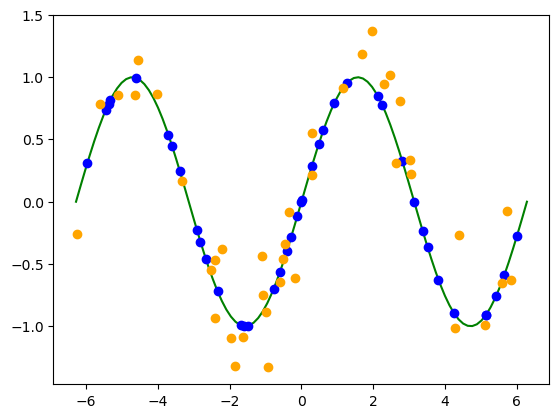

In [58]:
np.random.seed(7)
s = 100
x = np.linspace(-2 * np.pi, 2 * np.pi, s)
y = np.sin(x)
plt.plot(x, y, c='g', label='f(x)', zorder=1)

s = 40
x = np.random.uniform(-2 * np.pi, 2 * np.pi, s)
y = np.sin(x)
plt.scatter(x, y, c='blue', alpha=1, zorder=2)

x = np.random.uniform(-2 * np.pi, 2 * np.pi, s)
y = np.sin(x) + np.random.normal(0, .3, size=s)
plt.scatter(x, y, c='orange', alpha=1, zorder=3)

xmin, xmax, ymin, ymax = plt.axis()

plt.savefig("noise.pdf")

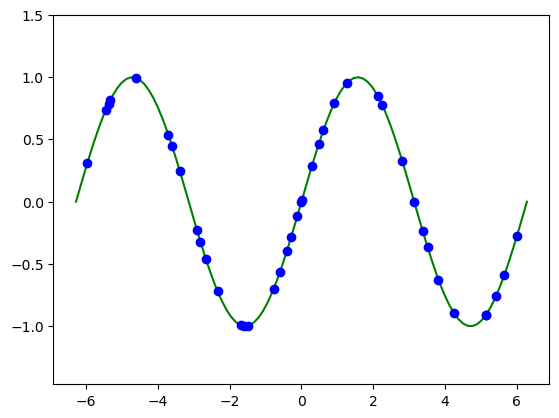

In [60]:
np.random.seed(7)
s = 100
x = np.linspace(-2 * np.pi, 2 * np.pi, s)
y = np.sin(x)
plt.plot(x, y, c='g', label='f(x)', zorder=1)

s = 40
x = np.random.uniform(-2 * np.pi, 2 * np.pi, s)
y = np.sin(x)
plt.scatter(x, y, c='blue', alpha=1, zorder=2)

plt.ylim(ymin, ymax)

plt.savefig("no-noise.pdf")

In [39]:
size = int(1e8)
L = np.array([])
W = np.array([])
for i in [2, 4, 8]:  #range(1, 8):
    #L = np.hstack((L, uniform.rvs(i, i, size=int(i * size / np.sum([2, 4, 8])))))
    #W = np.hstack((W, uniform.rvs(i, i, size=int(i * size / np.sum([2, 4, 8])))))
    L = np.hstack((L, uniform.rvs(i, i, size=int(i * size / 14))))
    W = np.hstack((W, uniform.rvs(i, i, size=int(i * size / 14))))

In [4]:
len(L) + 1

100000000

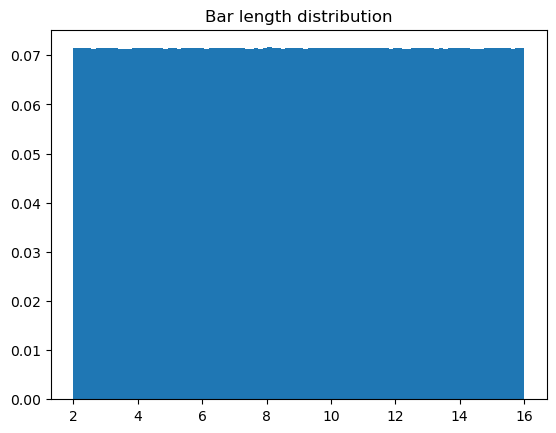

In [10]:
a = plt.hist(L, bins=100, density=True)
plt.title("Bar length distribution")
plt.savefig('distrib.pdf', format='pdf')

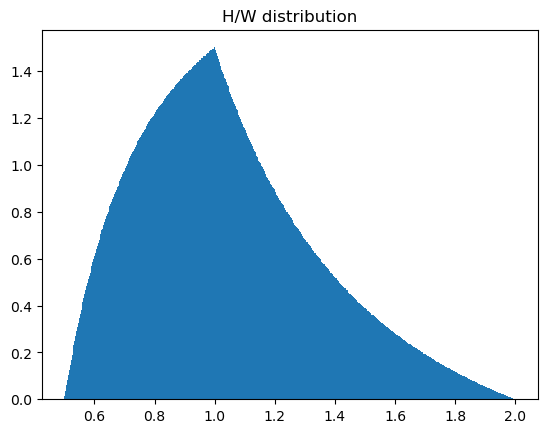

In [12]:
_ = plt.hist(L / W, bins=500, density=True)
plt.title("H/W distribution")
plt.savefig('ratio.pdf')

In [162]:
def delta(E, H, W, P, h):
    return 0.71 * 37. / 2. * P * H ** 3 / (E * (3 * W ** 2 * h ** 2 + h ** 4))


delta(35e9, 5, 3, 800e3, .1)

0.1389432485322896

(array([  967.,  2530.,  4085.,  5353.,  6704.,  7853.,  8760.,  9952.,
        11030., 11914., 12683., 13233., 14105., 14805., 15413., 15846.,
        16691., 17093., 17616., 17757., 18634., 18950., 19308., 19569.,
        20163., 20328., 20533., 20944., 21077., 21242., 21733., 22081.,
        22475., 22411., 21514., 20442., 19908., 19228., 18415., 17639.,
        16970., 16474., 15590., 15123., 14732., 13882., 13411., 12921.,
        12425., 12094., 11666., 11064., 10404., 10154.,  9737.,  9411.,
         9095.,  8635.,  8210.,  7954.,  7621.,  7326.,  7138.,  6697.,
         6324.,  6108.,  5893.,  5658.,  5404.,  5118.,  4919.,  4581.,
         4313.,  4197.,  3978.,  3677.,  3560.,  3357.,  3092.,  3042.,
         2846.,  2676.,  2459.,  2318.,  2184.,  1993.,  1890.,  1662.,
         1460.,  1340.,  1196.,  1029.,   931.,   791.,   701.,   542.,
          450.,   311.,   211.,    71.]),
 array([0.50079725, 0.51575323, 0.5307092 , 0.54566517, 0.56062114,
        0.57557712, 0.5905

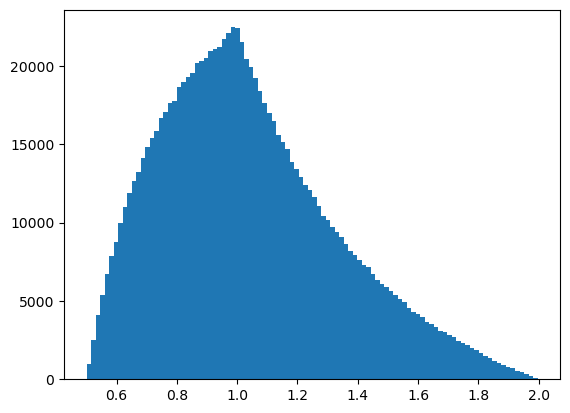

In [155]:
plt.hist(L / W, bins=100)